[View in Colaboratory](https://colab.research.google.com/github/katamit/Data-Science/blob/master/Toxic_comment_classification.ipynb)

In [0]:
# toxic comment classictionaion
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [1]:
#upload the kaggle credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"katamit","key":"0160ce365ba46762f645bb754e33182f"}'}

In [0]:
#SETTING GLOBAL VARIABLES
EMBEDDINGDIM = 300
MAXVOCABSIZE = 175303 
MAXSEQLENGTH = 200 
batchsize = 256 
epochs = 3

In [3]:
# is it there
ls -lha kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [4]:
!ls


sample_data


In [0]:
#File configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# load the data
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 59.3MB/s]
 42% 10.0M/23.8M [00:00<00:00, 49.1MB/s]
100% 23.8M/23.8M [00:00<00:00, 93.2MB/s]
 93% 25.0M/26.7M [00:00<00:00, 42.2MB/s]
100% 26.7M/26.7M [00:00<00:00, 101MB/s] 
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 236MB/s]


In [8]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.8MB/s 
    100% |████████████████████████████████| 235kB 6.2MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
!mkdir -p ~/.Data
!mv train.csv.zip test.csv.zip test_labels.csv.zip sample_submission.csv.zip ~/.Data

In [5]:
!ls ~/.Data

ls: cannot access '/root/.Data': No such file or directory


In [41]:

!unzip ~/.Data/test.csv.zip

Archive:  /root/.Data/test.csv.zip
  inflating: test.csv                


In [0]:
!mv test.csv ~/.Data/


In [0]:
#READING AND SETTING UP THE TRAIN.CSV FILE
traincomments = pd.read_csv("~/.Data/train.csv", sep=',', header=0)

In [8]:
traincomments.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [32]:

print("Num Train:", traincomments.shape[0])

Num Train: 159571


In [9]:
label_names = list(traincomments.columns)[2:]
print(list(label_names))

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [0]:
ytrain = traincomments[label_names].values
# print(ytrain.head)

In [108]:
ytrain

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [11]:
#READING AND SETTING UP THE TEST.CSV FILE
testcomments = pd.read_csv("~/.Data/test.csv", sep=',', header=0)
# testcomments.columns=['id', 'comment_text']
print("num test: ", testcomments.shape[0])
testcomments.head()

num test:  153164


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [0]:
#CLEANING UP THE TEXT
#Function to clean up the text
def standardizetext(df, textfield):
    df[textfield] = df[textfield].str.replace(r"http\S+", "")
    df[textfield] = df[textfield].str.replace(r"http", "")
    df[textfield] = df[textfield].str.replace(r"@\S+", "")
    df[textfield] = df[textfield].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[textfield] = df[textfield].str.replace(r"@", "at")
    df[textfield] = df[textfield].str.lower()
    return df

In [13]:
traincomments.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [14]:
#Cleaning the train data and making the new CSV file -> train_clean_data.csv
traincomments.fillna('_NA_')
traincomments = standardizetext(traincomments, "comment_text")
traincomments.to_csv(r"~/.Data/traincleandata.csv")
traincomments.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero any chance you remember...",0,0,0,0,0,0


In [39]:
#Cleaning the test data and making the new CSV file -> test_clean_data.csv
testcomments.fillna('_NA_')
testcomments = standardizetext(testcomments, "comment_text")
testcomments.to_csv("~/.Data/testcleandata.csv")
testcomments.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...
1,0000247867823ef7,from rfc \n\n the title is fine as it is...
2,00013b17ad220c46,""" \n\n sources \n\n zawe ashton on lap..."
3,00017563c3f7919a,"if you have a look back at the source, the in..."
4,00017695ad8997eb,i don't anonymously edit articles at all


In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [0]:
#TOKENIZING THE TEXT
tokenizer = RegexpTokenizer(r'\w+')
cleantraincomments = pd.read_csv(r"~/.Data/traincleandata.csv")

In [57]:
cleantraincomments['comment_text'] = cleantraincomments['comment_text'].astype('str')
print(cleantraincomments['comment_text'].dtype)
cleantraincomments['tokens'] = cleantraincomments['comment_text'].apply(tokenizer.tokenize)

object


In [58]:
cleantraincomments['tokens']

0         [explanation, why, the, edits, made, under, my...
1         [d, aww, he, matches, this, background, colour...
2         [hey, man, i, m, really, not, trying, to, edit...
3         [more, i, can, t, make, any, real, suggestions...
4         [you, sir, are, my, hero, any, chance, you, re...
5         [congratulations, from, me, as, well, use, the...
6         [cocksucker, before, you, piss, around, on, my...
7         [your, vandalism, to, the, matt, shirvington, ...
8         [sorry, if, the, word, nonsense, was, offensiv...
9         [alignment, on, this, subject, and, which, are...
10        [fair, use, rationale, for, image, wonju, jpg,...
11        [bbq, be, a, man, and, lets, discuss, it, mayb...
12        [hey, what, is, it, at, talk, what, is, it, an...
13        [before, you, start, throwing, accusations, an...
14        [oh, and, the, girl, above, started, her, argu...
15        [juelz, santanas, age, in, 2002, juelz, santan...
16        [bye, don, t, look, come, or, 

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [71]:
#Deleting the stop words
cleantraincomments["tokens"] = cleantraincomments["tokens"].apply(
    lambda vec: [word for word in vec if word not in stopwords.words('english')])
cleantraincomments.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, edits, made, username, hardcore,..."
1,1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,"[aww, matches, background, colour, seemingly, ..."
2,2,000113f07ec002fd,"hey man, i'm really not trying to edit war it...",0,0,0,0,0,0,"[hey, man, really, trying, edit, war, guy, con..."
3,3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,"[make, real, suggestions, improvement, wondere..."
4,4,0001d958c54c6e35,"you, sir, are my hero any chance you remember...",0,0,0,0,0,0,"[sir, hero, chance, remember, page]"


In [0]:
cleantraincomments.to_csv(r'~/.Data/trainCleanDatatokens.csv')

In [0]:
cleantraincomments = pd.read_csv(r'~/.Data/trainCleanDatatokens.csv')

In [0]:
cleantraincomments['comment_text'] = cleantraincomments['comment_text'].astype('str')

In [28]:
cleantraincomments.head()

,Unnamed: 0,Unnamed: 0.1,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0,0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,"['explanation', 'edits', 'made', 'username', '..."
1,1,1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,"['aww', 'matches', 'background', 'colour', 'se..."
2,2,2,000113f07ec002fd,"hey man, i'm really not trying to edit war it...",0,0,0,0,0,0,"['hey', 'man', 'really', 'trying', 'edit', 'wa..."
3,3,3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,"['make', 'real', 'suggestions', 'improvement',..."
4,4,4,0001d958c54c6e35,"you, sir, are my hero any chance you remember...",0,0,0,0,0,0,"['sir', 'hero', 'chance', 'remember', 'page']"


In [76]:
!head ~/.Data/trainCleanDatatokens.csv

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0,0000997932d777bf,"explanation
why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac  and please don't remove the template from the talk page since i'm retired now 89 205 38 27",0,0,0,0,0,0,"['explanation', 'edits', 'made', 'username', 'hardcore', 'metallica', 'fan', 'reverted', 'vandalisms', 'closure', 'gas', 'voted', 'new', 'york', 'dolls', 'fac', 'please', 'remove', 'template', 'talk', 'page', 'since', 'retired', '89', '205', '38', '27']"
1,1,000103f0d9cfb60f,"d'aww! he matches this background colour i'm seemingly stuck with  thanks   (talk) 21 51, january 11, 2016 (utc)",0,0,0,0,0,0,"['aww', 'matches', 'background', 'colour', 'seemingly', 'stuck', 'thanks', 'talk', '21', '51', 'january', '11', '2016', 'utc']"
2,2,000113f07ec002fd,"hey man, i'm really not trying to edit war  it's just t

In [44]:
# similary cleaning the test comment data
cleantestcomments = pd.read_csv(r"~/.Data/testcleandata.csv")
cleantestcomments['comment_text'] = cleantestcomments['comment_text'].astype('str') 
cleantestcomments.dtypes
cleantestcomments["tokens"] = cleantestcomments["comment_text"].apply(tokenizer.tokenize)
cleantestcomments["tokens"] = cleantestcomments["tokens"].apply(lambda vec: [word for word in vec if word not in stopwords.words('english')])
cleantestcomments.head()

,Unnamed: 0,id,comment_text,tokens
0,0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...,"[yo, bitch, ja, rule, succesful, ever, whats, ..."
1,1,0000247867823ef7,from rfc \n\n the title is fine as it is...,"[rfc, title, fine, imo]"
2,2,00013b17ad220c46,""" \n\n sources \n\n zawe ashton on lap...","[sources, zawe, ashton, lapland]"
3,3,00017563c3f7919a,"if you have a look back at the source, the in...","[look, back, source, information, updated, cor..."
4,4,00017695ad8997eb,i don't anonymously edit articles at all,"[anonymously, edit, articles]"


In [0]:
cleantestcomments.to_csv(r'~/.Data/testCleanDatatokens.csv')

In [37]:
!ls ~/.Data

GoogleNews-vectors-negative300.bin.gz	      test_labels.csv.zip
googles-trained-word2vec-model-in-python.zip  traincleandata.csv
sample_submission.csv.zip		      trainCleanDatatokens.csv
test.csv				      train.csv
test.csv.zip				      train.csv.zip


In [78]:
!pip install gensim
# import gensim

    100% |████████████████████████████████| 23.5MB 1.6MB/s 
    100% |████████████████████████████████| 1.4MB 12.5MB/s 
    100% |████████████████████████████████| 133kB 24.6MB/s 
    100% |████████████████████████████████| 4.7MB 899kB/s 
    100% |████████████████████████████████| 61kB 17.7MB/s 
    100% |████████████████████████████████| 552kB 22.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
import gensim

In [91]:
!kaggle datasets download -d umbertogriffo/googles-trained-word2vec-model-in-python

 99% 1.52G/1.53G [00:12<00:00, 158MB/s]
100% 1.53G/1.53G [00:12<00:00, 129MB/s]


In [0]:
!mv GoogleNews-vectors-negative300.bin.gz ~/.Data/

In [0]:

word2vecpath = r"~/.Data/GoogleNews-vectors-negative300.bin.gz"

In [0]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vecpath, binary=True)

In [22]:
word2vec.vectors.shape

(3000000, 300)

In [1]:
# word2vec.similar_by_word('name')

NameError: ignored

In [0]:
def getaverageword2vec(tokenslist, vector, generatemissing=False, k=300):
    if len(tokenslist)<1:
        return np.zeros(k)
    if generatemissing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokenslist]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokenslist]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged
#GETTING EMBEDDINGS
def getword2vecembeddings(vectors, cleancomments, generatemissing=False):
    embeddings = cleancomments['tokens'].apply(lambda x: getaverageword2vec(x, vectors, 
                                                                          generatemissing=generatemissing))
    return list(embeddings)

In [0]:
import keras
from keras.preprocessing.text import Tokenizer

In [0]:
#TRAIN EMBEDDING
trainingembeddings = getword2vecembeddings(word2vec, cleantraincomments, generatemissing=True)
tokenizer = Tokenizer(num_words=MAXVOCABSIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(cleantraincomments["comment_text"].tolist())
trainingsequences = tokenizer.texts_to_sequences(cleantraincomments["comment_text"].tolist())

In [30]:
trainwordindex  = tokenizer.word_index
print('Found %s unique tokens.' % len(trainwordindex))

Found 190289 unique tokens.


In [31]:
trainwordindex

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'are': 18,
 'have': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'my': 28,
 'an': 29,
 'wikipedia': 30,
 'from': 31,
 'by': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'talk': 37,
 'so': 38,
 'what': 39,
 'can': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'no': 46,
 'would': 47,
 'one': 48,
 'like': 49,
 'just': 50,
 'they': 51,
 'he': 52,
 'which': 53,
 'any': 54,
 'been': 55,
 'should': 56,
 'more': 57,
 'we': 58,
 "don't": 59,
 'other': 60,
 'some': 61,
 'who': 62,
 'here': 63,
 'see': 64,
 'his': 65,
 'also': 66,
 'think': 67,
 'because': 68,
 'know': 69,
 'how': 70,
 'edit': 71,
 'am': 72,
 'why': 73,
 "i'm": 74,
 'up': 75,
 'people': 76,
 'only': 77,
 "it's": 78,
 'out': 79,
 'use': 80,
 'articles': 81,

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
traincnndata = pad_sequences(trainingsequences, maxlen=MAXSEQLENGTH)

In [0]:
# traincnndata.shape
# np.save('testcnndata.npy', testcnndata)
# traincnndata.tofile(r'~/.Data/traincnndata.dat')

In [50]:
trainembeddingweights = np.zeros((len(trainwordindex)+1, EMBEDDINGDIM))
for word,index in trainwordindex.items():
    trainembeddingweights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDINGDIM)
print(trainembeddingweights.shape)

(190290, 300)


In [0]:
testsequences = tokenizer.texts_to_sequences(cleantestcomments["comment_text"].tolist())
testcnndata = pad_sequences(testsequences, maxlen=MAXSEQLENGTH)

In [56]:
testcnndata.shape

(153164, 200)

In [0]:
from keras.models import Model
from keras.layers import MaxPooling1D, Conv1D, Embedding
from keras.layers import Input, Flatten, Dropout, Dense, Merge

In [0]:
## Defining the cnn
def convNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
  embedding_layer = Embedding(num_words, 
                              embedding_dim, 
                              weights=[embeddings], 
                              input_length= max_sequence_length, 
                              trainable= trainable)
  sequence_input = Input(shape= (max_sequence_length,),dtype='int32')
  embedded_sequence = embedding_layer(sequence_input)
  
  convs = []
  filter_sizes = [3,4,5]
  
  for filter_size in filter_sizes:
    conv_1 = Conv1D(filters=128, kernel_size= filter_size, activation='relu')(embedded_sequence)
    pool_1 = MaxPooling1D(pool_size = 3)(conv_1)
    convs.append(conv_1)
    
  merge_1 = Merge(mode='concat', concat_axis=1)(convs)
  
  # add a 1D convnet with global maxpooling,
  conv = Conv1D(filters = 128, kernel_size = 3, activation='relu')(embedded_sequence)
  pool = MaxPooling1D(pool_size =3)(conv)
  
  if extra_conv:
    x = Dropout(0.5)(merge_1)
  else:
    x = Dropout(0.5)(pool)
  x= Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.5)(x)
  # Finally, we feed the output into a Sigmoid layer.
    # The reason why sigmoid is used is because we are trying to achieve a binary classification(1,0) 
    # for each of the 6 labels, and the sigmoid function will squash the output between the bounds of 0 and 1.
  preds = Dense(labels_index, activation='sigmoid')(x)
  model = Model(sequence_input, preds)
  model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['acc'])
  model.summary()
  return model
  
  

In [0]:
x_train = traincnndata
y_tr = ytrain

In [79]:
model =convNet(trainembeddingweights, MAXSEQLENGTH, len(trainwordindex)+1, EMBEDDINGDIM, 
                len(list(label_names)), False)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 200, 300)     57087000    input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 198, 128)     115328      embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 197, 128)     153728      embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_15 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [0]:
from keras.callbacks import EarlyStopping

In [0]:
#DEFINING CALLBACKS
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbackslist = [earlystopping]

In [80]:
#TRAINING THE NETWORK
hist = model.fit(x_train, y_tr, epochs=epochs, callbacks=callbackslist, validation_split=0.1, shuffle=True, batch_size=batchsize)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 64s 443us/step - loss: 0.1025 - acc: 0.9667 - val_loss: 0.0770 - val_acc: 0.9734
Epoch 2/3
143613/143613 [==============================] - 61s 424us/step - loss: 0.0720 - acc: 0.9748 - val_loss: 0.0641 - val_acc: 0.9769
Epoch 3/3
143613/143613 [==============================] - 61s 423us/step - loss: 0.0628 - acc: 0.9774 - val_loss: 0.0607 - val_acc: 0.9786


In [87]:
yPred = model.predict(testcnndata, batch_size=1024, verbose=1)

153164/153164 [==============================] - 20s 129us/step


In [0]:
ytest = pd.read_csv(r'~/.Data/test_labels.csv')

In [90]:
ytest

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [0]:

#CREATING THE SUBMISSION.CSV FILE
submissiondf = pd.DataFrame(columns=['id'] + label_names)
submissiondf['id'] = testcomments['id'].values 
submissiondf[label_names] = yPred
submissiondf.to_csv("~/.Data/cnn_submission.csv", index=False)

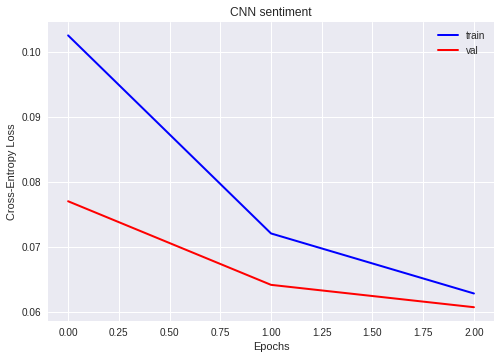

In [96]:
#GENERATING THE GRAPHS
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

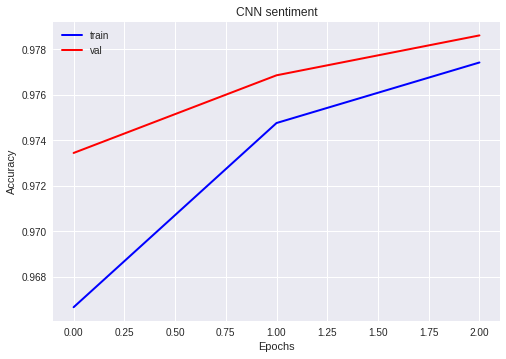

In [97]:
plt.figure()
plt.plot(hist.history['acc'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [0]:
# Saving the model for later use
from keras.models import model_from_json

In [99]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
!mv *.npy ~/.Data/

In [106]:
!ls

edit	     testcleandata.csv
kaggle.json  uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download
model.h5     wget-log
model.json   wget-log.1
sample_data


In [107]:
!ls ~/.Data

cnn_submission.csv			      test.csv.zip
GoogleNews-vectors-negative300.bin.gz	      test_labels.csv
googles-trained-word2vec-model-in-python.zip  test_labels.csv.zip
sample_submission.csv.zip		      traincleandata.csv
testcleandata.csv			      trainCleanDatatokens.csv
testCleanDatatokens.csv			      traincnndata.npy
testcnndata.npy				      train.csv
test.csv				      train.csv.zip


[Reference](https:www.kaggle.com/omkarsabnis/toxic-comment-classification/notebook)

Everything is saved in the .~/.Data folder for next time use
Model is also save in ~ itself